# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import json


# Path

In [3]:
train_path1 = "/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_challenges.json"
train_path2 = "/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/arc-agi_training_solutions.json"

# Data Exploration

In [6]:
with open(train_path1, 'r') as f:
    data_dict = json.load(f)

In [11]:
# List each id in the training set

first_10_ids = list(data_dict.keys())[:10]
first_10_ids

['007bbfb7',
 '00d62c1b',
 '017c7c7b',
 '025d127b',
 '045e512c',
 '0520fde7',
 '05269061',
 '05f2a901',
 '06df4c85',
 '08ed6ac7']

In [12]:
# Output from each item

data_dict["007bbfb7"]

{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
   'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
  {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
   'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 4, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 4, 0, 0, 0, 0]]},
  {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
   'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 2],


# Visualize

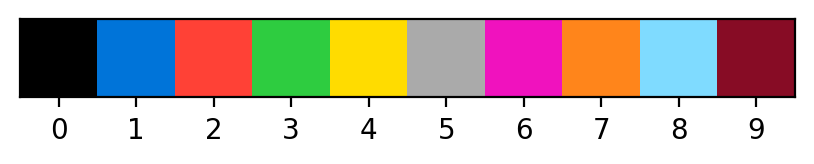

In [13]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin=0, vmax=9)
color_list = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]

# ......................................................................................................
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

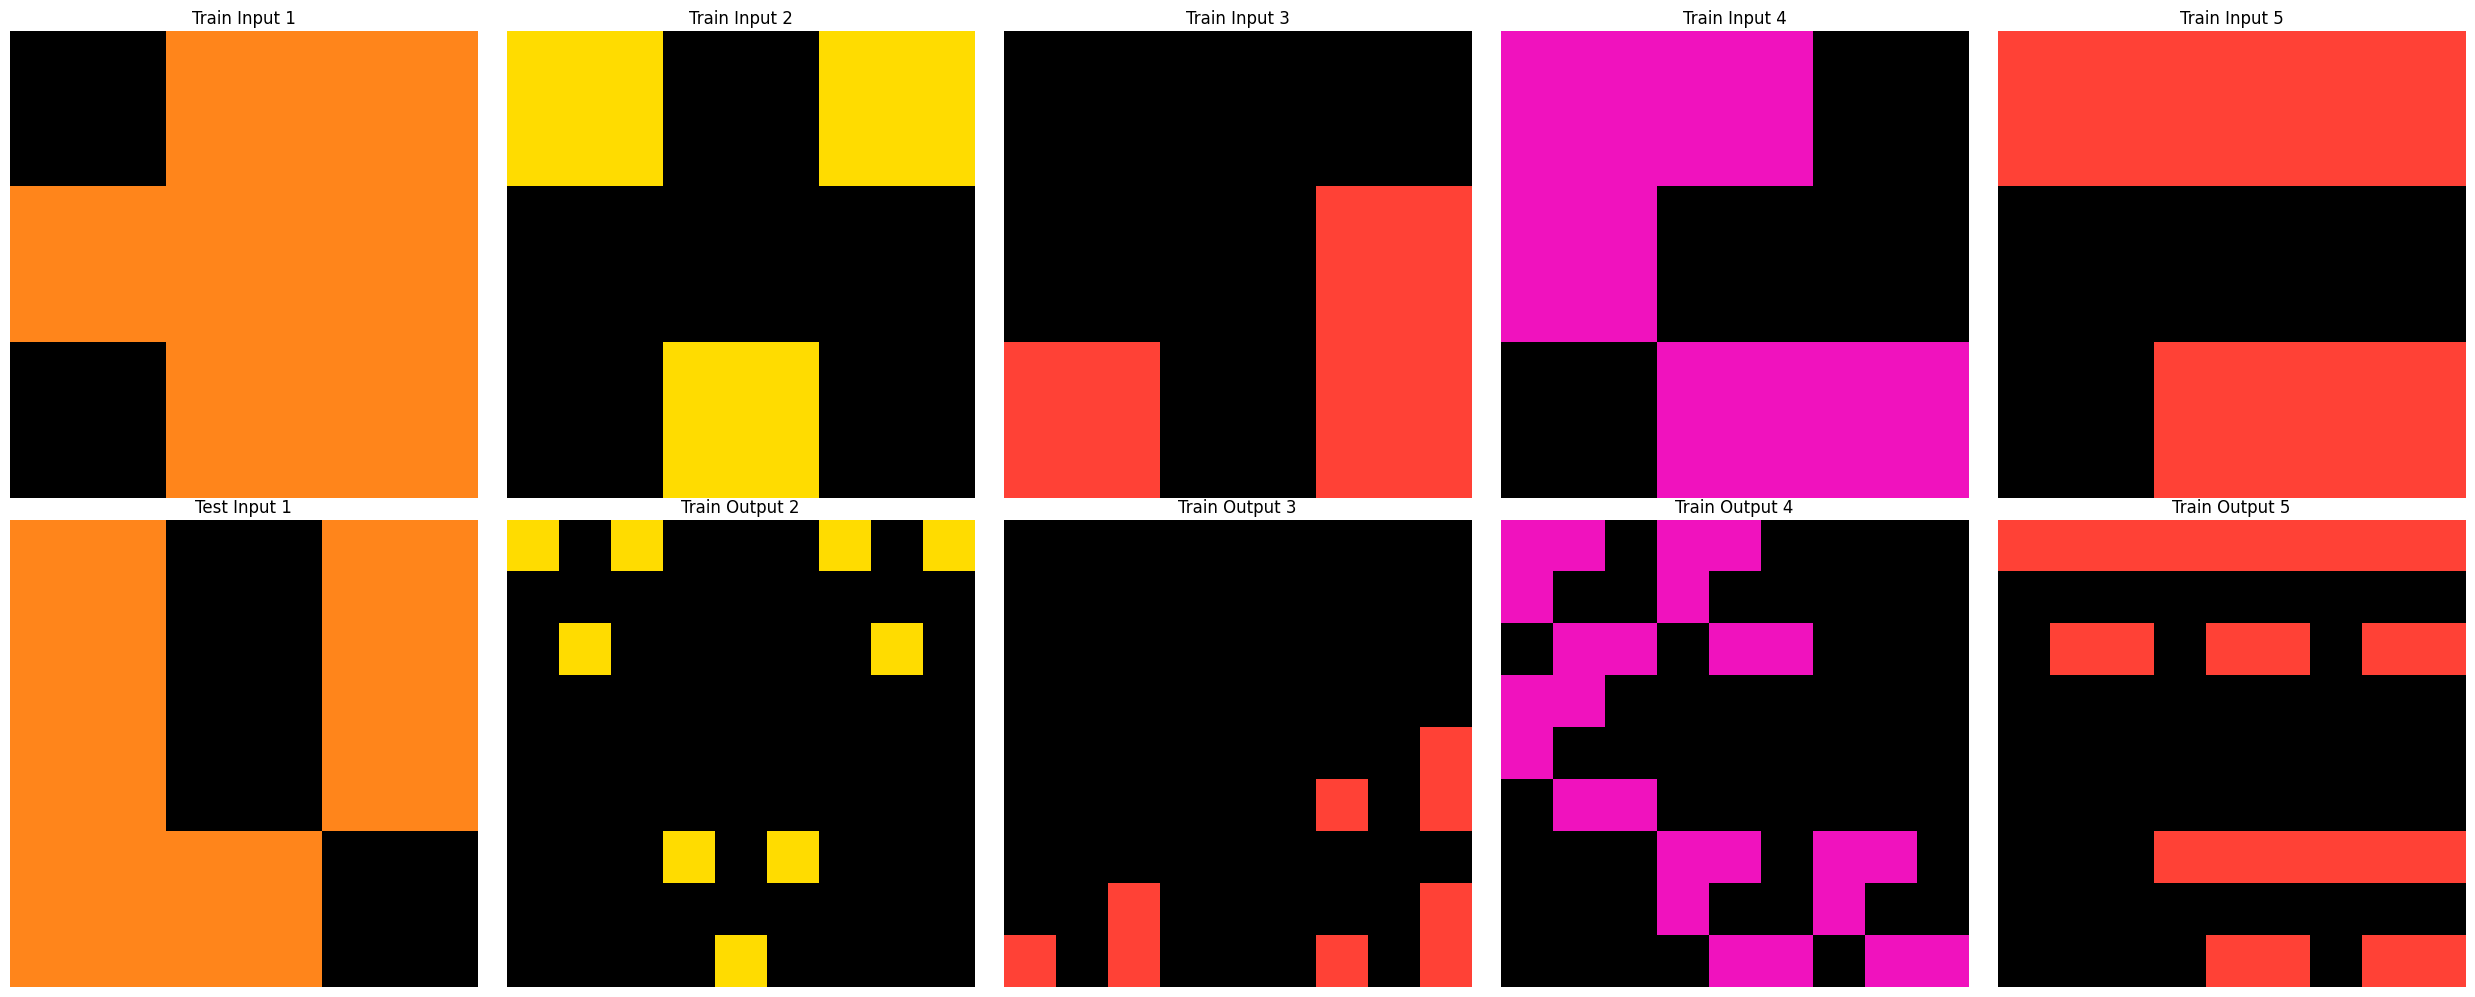

In [15]:
# Function to plot the data
def plot_data(data, title, cmap, norm, ax):
    ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.axis('off')

# Extract the first element and plot all inputs and outputs
key = "007bbfb7"
test_data = data_dict[key]["test"]
train_data = data_dict[key]["train"]


# Determine the number of columns needed
num_columns = max(len(test_data), len(train_data))

# Create subplots
fig, axes = plt.subplots(2, num_columns, figsize=(num_columns * 5, 10))

# Plot train inputs and outputs side by side
for i, train in enumerate(train_data):
    plot_data(train["input"], f"Train Input {i+1}", cmap, norm, axes[0, i])
    if "output" in train:
        plot_data(train["output"], f"Train Output {i+1}", cmap, norm, axes[1, i])

# Plot test inputs below the train inputs
for i, test in enumerate(test_data):
    col = len(train_data) + i
    plot_data(test["input"], f"Test Input {i+1}", cmap, norm, axes[1, i])


# Remove empty subplots
for i in range(len(train_data), num_columns):
    axes[0, i].axis('off')
    if i >= len(train_data):
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()